In [29]:
import numpy as np # linear algebra
import pandas as pd # data processing
import os

In [30]:
df = pd.read_csv('./test.csv')
print(df.sample())

      label  1x1  1x2  1x3  1x4  1x5  1x6  1x7  1x8  1x9  ...  28x19  28x20  \
1656      2    0    0    0    0    0    0    0    0    0  ...      0      0   

      28x21  28x22  28x23  28x24  28x25  28x26  28x27  28x28  
1656      0      0      0      0      0      0      0      0  

[1 rows x 785 columns]


(28, 28)


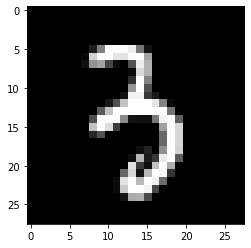

In [31]:
import matplotlib.pyplot as plt
pixels = df.iloc[4244,1:].values.astype('int').reshape(28,28)
print(pixels.shape)
plt.imshow(pixels,cmap='gray')

In [32]:
from sklearn.model_selection import train_test_split
X = df.iloc[:,1:]
y=df.iloc[:,0]
X_train,X_test,y_train,y_test =train_test_split(X,y,test_size = 0.2,random_state =42)


In [33]:
print(X_train.shape)
print(X_test.shape)

(8000, 784)
(2000, 784)


In [34]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [35]:
import time
start = time.time()
y_pred = knn.predict(X_test)
print(time.time()-start)

2.1249821186065674


In [36]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.943

In [37]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [38]:
from sklearn.decomposition import PCA
pca  = PCA(n_components=300)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
print(X_train_pca.shape)


(8000, 300)


In [39]:
knn1  = KNeighborsClassifier()
knn1.fit(X_train_pca,y_train)
predicted_values = knn1.predict(X_test_pca)

In [40]:
print(accuracy_score(y_test,predicted_values))

0.9255


In [41]:
#visualizing the data in reduced dimensions
pca = PCA(n_components=3)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)


In [46]:
import plotly.express as px 
y_train_pca = y_train.astype('str')

fig = px.scatter_3d(x=X_train_pca[:,0],
                 y = X_train_pca[:,1],
                 z= X_train_pca[:,2],
                 color=y_train_pca)
fig.show()

In [47]:
print(pca.explained_variance_)
print(pca.explained_variance_ratio_)


[41.93316742 28.38891987 27.12657211]
[0.06304951 0.04268477 0.04078674]


In [ ]:
#now we have to calculate the optimal number of reduced dimesions to get the perfect result in form of reduced dimensions..

# to do that we sum the percentage of variance of each eigen value have on original data 

#that percentage must be >= 90%



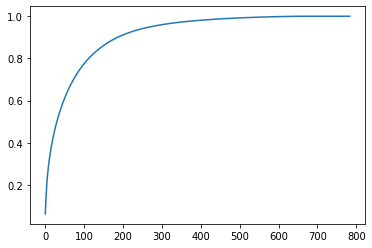

In [ ]:
import matplotlib.pyplot as plt
pca = PCA(n_components=None)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

plt.plot(np.cumsum(pca.explained_variance_ratio_))


In [ ]:
#we clearly see that 200 dimesion is the point where are cumsum is 90% so 200 dimension is the optimal to get perfect results 

In [ ]:
#when pca do not help
#when variance on x-axis is same as y axis
#when there is a pattern in your data like x square shape or sine pattern or cosine.if you try to draw pca for this the relationship between the data would get destroyed